In [1]:
import sys
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
import numpy as np
import pandas as pd
import seaborn as sns#; sns.set()
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA

from dynamicviz.dynamicviz import boot, score

import pacmap
#import phate



# read in SVZ 1000-cell dataset
SVZ_X = np.loadtxt("./X_mousebrain.txt").astype(float)

SVZ_Y = pd.DataFrame(np.ones(3618), columns=["lab"])


# In[ ]:


# run for base methods
savebase = "./mousebrain/dynamicviz_"
nboots = 20 # CHANGE TO 100
njobs = 4

hyper_dict = {
    'tsne': list(range(5,151,5)), # perplexity
    'umap': [700,800,900], # n_neighbors [5,10,20,40,80,160,320,640] + [700, 800, 900]
    'lle': [20,30,40,50,60,80,100,120,140], # n_neighbors
    'mlle': [20,30,40,50,60,80,100,120,140], # n_neighbors
    'isomap': [180,220,260,300,340,380,420], # n_neighbors: [20,40,50,60,80,100,120,140] + [180,220,260,300,340,380,420]
    'trimap': [2,4,6,8,10,12,14,16,18,20], # n_inliers
    'pacmap': [2,6,10,14,18,22,26,30,34,38], # n_neighbors
}


for method in ['tsne']:#['lle', 'mlle', 'pca', 'isomap', 'trimap', 'pacmap', 'tsne', 'umap', 'mds']:
    
    try:
    
        if method == 'pca': # no hyperparameters to optimize
            savename = savebase+'B'+str(nboots)+'_'+method
            out = boot.generate(SVZ_X, Y=SVZ_Y, method=method, B=nboots, use_n_pcs=False, num_jobs=njobs,
                save=savename+".csv", random_seed=452)
            variance_scores = score.variance(out, method="global", X_orig=SVZ_X, normalize_pairwise_distance=False)
            np.savetxt(savename+'_variance.csv', variance_scores)
            
        elif method == 'mds': # no hyperparameters to optimize
            savename = savebase+'B'+str(nboots)+'_'+method
            out = boot.generate(SVZ_X, Y=SVZ_Y, method=method, B=nboots, use_n_pcs=50, num_jobs=njobs,
                save=savename+".csv", random_seed=452)
            variance_scores = score.variance(out, method="global", X_orig=SVZ_X, normalize_pairwise_distance=False)
            np.savetxt(savename+'_variance.csv', variance_scores)

        else: # optimize hyperparameters

            for hyper in hyper_dict[method]:

                if method == 'trimap':
                    method2 = trimap.TRIMAP(n_dims=2, n_inliers=hyper)
                    savename = savebase+'B'+str(nboots)+'_trimap_neighbors'+str(hyper)
                    out = boot.generate(SVZ_X, Y=SVZ_Y, method=method2, B=nboots, use_n_pcs=50, num_jobs=njobs,
                        save=savename+".csv", random_seed=452)

                elif method == 'pacmap':
                    method2 = pacmap.PaCMAP(n_dims=2, n_neighbors=hyper)
                    savename = savebase+'B'+str(nboots)+'_pacmap_neighbors'+str(hyper)
                    out = boot.generate(SVZ_X, Y=SVZ_Y, method=method2, B=nboots, use_n_pcs=50, num_jobs=njobs,
                        save=savename+".csv", random_seed=452)

                else: # base methods

                    if method == 'tsne': # perplexity
                        savename = savebase+'B'+str(nboots)+'_tsne_perplexity'+str(hyper)
                        out = boot.generate(SVZ_X, Y=SVZ_Y, method=method, B=nboots, use_n_pcs=50, num_jobs=njobs,
                            save=savename+".csv", random_seed=452, perplexity=hyper)

                    else: # n_neighbors
                        savename = savebase+'B'+str(nboots)+'_'+method+'_neighbors'+str(hyper)
                        out = boot.generate(SVZ_X, Y=SVZ_Y, method=method, B=nboots, use_n_pcs=50, num_jobs=njobs,
                            save=savename+".csv", random_seed=452, n_neighbors=hyper)

                # Generate variance scores and save
                variance_scores = score.variance(out, method="global", X_orig=SVZ_X, normalize_pairwise_distance=False)
                np.savetxt(savename+'_variance.csv', variance_scores)
                
    except:
        print('Failed on '+method)
        continue

100%|██████████| 20/20 [01:10<00:00,  3.54s/it]


Setting up neighborhoods...
--- 0.27915096282958984 seconds ---
Populating distances...
--- 1590.7940649986267 seconds ---
Computing mean pairwise distance for normalization...
--- 173.75093984603882 seconds ---
Computing variance scores...
--- 334.26989006996155 seconds ---


100%|██████████| 20/20 [01:05<00:00,  3.25s/it]


Setting up neighborhoods...
--- 0.2876269817352295 seconds ---
Populating distances...
--- 1573.42698097229 seconds ---
Computing mean pairwise distance for normalization...
--- 174.88386487960815 seconds ---
Computing variance scores...
--- 334.05416917800903 seconds ---


100%|██████████| 20/20 [01:08<00:00,  3.42s/it]


Setting up neighborhoods...
--- 0.2565138339996338 seconds ---
Populating distances...
--- 1574.370218038559 seconds ---
Computing mean pairwise distance for normalization...
--- 175.11089324951172 seconds ---
Computing variance scores...
--- 334.95678877830505 seconds ---


100%|██████████| 20/20 [01:11<00:00,  3.55s/it]


Setting up neighborhoods...
--- 0.26013898849487305 seconds ---
Populating distances...
--- 1567.6094398498535 seconds ---
Computing mean pairwise distance for normalization...
--- 178.34770512580872 seconds ---
Computing variance scores...
--- 335.76715993881226 seconds ---


100%|██████████| 20/20 [01:18<00:00,  3.94s/it]


Setting up neighborhoods...
--- 0.2685239315032959 seconds ---
Populating distances...
--- 1553.4382119178772 seconds ---
Computing mean pairwise distance for normalization...
--- 177.18341588974 seconds ---
Computing variance scores...
--- 334.812539100647 seconds ---


100%|██████████| 20/20 [01:22<00:00,  4.15s/it]


Setting up neighborhoods...
--- 0.2881951332092285 seconds ---
Populating distances...
--- 1572.538696050644 seconds ---
Computing mean pairwise distance for normalization...
--- 174.55549788475037 seconds ---
Computing variance scores...
--- 335.4239590167999 seconds ---


100%|██████████| 20/20 [01:21<00:00,  4.09s/it]


Setting up neighborhoods...
--- 0.289154052734375 seconds ---
Populating distances...
--- 1574.4361221790314 seconds ---
Computing mean pairwise distance for normalization...
--- 173.96467900276184 seconds ---
Computing variance scores...
--- 334.7901020050049 seconds ---


100%|██████████| 20/20 [01:23<00:00,  4.20s/it]


Setting up neighborhoods...
--- 0.2789638042449951 seconds ---
Populating distances...
--- 1570.2890088558197 seconds ---
Computing mean pairwise distance for normalization...
--- 173.7103569507599 seconds ---
Computing variance scores...
--- 334.73187828063965 seconds ---


100%|██████████| 20/20 [01:26<00:00,  4.33s/it]


Setting up neighborhoods...
--- 0.2844979763031006 seconds ---
Populating distances...
--- 1574.8538661003113 seconds ---
Computing mean pairwise distance for normalization...
--- 176.67986297607422 seconds ---
Computing variance scores...
--- 334.45577812194824 seconds ---


100%|██████████| 20/20 [01:29<00:00,  4.46s/it]


Setting up neighborhoods...
--- 0.27804994583129883 seconds ---
Populating distances...
--- 1572.5509870052338 seconds ---
Computing mean pairwise distance for normalization...
--- 173.3260452747345 seconds ---
Computing variance scores...
--- 334.7266948223114 seconds ---


100%|██████████| 20/20 [01:33<00:00,  4.66s/it]


Setting up neighborhoods...
--- 0.28517723083496094 seconds ---
Populating distances...
--- 1573.4128906726837 seconds ---
Computing mean pairwise distance for normalization...
--- 173.36578822135925 seconds ---
Computing variance scores...
--- 334.0745129585266 seconds ---


100%|██████████| 20/20 [01:38<00:00,  4.91s/it]


Setting up neighborhoods...
--- 0.280609130859375 seconds ---
Populating distances...
--- 1573.587201833725 seconds ---
Computing mean pairwise distance for normalization...
--- 172.98456692695618 seconds ---
Computing variance scores...
--- 335.6935250759125 seconds ---


100%|██████████| 20/20 [01:41<00:00,  5.06s/it]


Setting up neighborhoods...
--- 0.2887387275695801 seconds ---
Populating distances...
--- 1576.539055109024 seconds ---
Computing mean pairwise distance for normalization...
--- 174.0947630405426 seconds ---
Computing variance scores...
--- 334.7998239994049 seconds ---


100%|██████████| 20/20 [01:39<00:00,  4.96s/it]


Setting up neighborhoods...
--- 0.2977468967437744 seconds ---
Populating distances...
--- 1566.5912292003632 seconds ---
Computing mean pairwise distance for normalization...
--- 175.3271827697754 seconds ---
Computing variance scores...
--- 336.22942781448364 seconds ---


100%|██████████| 20/20 [01:48<00:00,  5.44s/it]


Setting up neighborhoods...
--- 0.27703404426574707 seconds ---
Populating distances...
--- 1563.599394083023 seconds ---
Computing mean pairwise distance for normalization...
--- 177.68472695350647 seconds ---
Computing variance scores...
--- 334.9920530319214 seconds ---


100%|██████████| 20/20 [01:52<00:00,  5.64s/it]


Setting up neighborhoods...
--- 0.2899782657623291 seconds ---
Populating distances...
--- 1563.9452781677246 seconds ---
Computing mean pairwise distance for normalization...
--- 177.18079471588135 seconds ---
Computing variance scores...
--- 333.94043493270874 seconds ---


100%|██████████| 20/20 [01:56<00:00,  5.85s/it]


Setting up neighborhoods...
--- 0.2792809009552002 seconds ---
Populating distances...
--- 1561.046131849289 seconds ---
Computing mean pairwise distance for normalization...
--- 174.19759321212769 seconds ---
Computing variance scores...
--- 334.912850856781 seconds ---


100%|██████████| 20/20 [02:01<00:00,  6.06s/it]


Setting up neighborhoods...
--- 0.2771008014678955 seconds ---
Populating distances...
--- 1574.4290659427643 seconds ---
Computing mean pairwise distance for normalization...
--- 175.95283579826355 seconds ---
Computing variance scores...
--- 335.6883249282837 seconds ---


100%|██████████| 20/20 [01:58<00:00,  5.92s/it]


Setting up neighborhoods...
--- 0.295529842376709 seconds ---
Populating distances...
--- 1589.474261045456 seconds ---
Computing mean pairwise distance for normalization...
--- 178.80852699279785 seconds ---
Computing variance scores...
--- 335.72512578964233 seconds ---


100%|██████████| 20/20 [02:05<00:00,  6.29s/it]


Setting up neighborhoods...
--- 0.27616095542907715 seconds ---
Populating distances...
--- 1571.6355888843536 seconds ---
Computing mean pairwise distance for normalization...
--- 175.3988778591156 seconds ---
Computing variance scores...
--- 341.0527307987213 seconds ---


100%|██████████| 20/20 [01:52<00:00,  5.62s/it]


Setting up neighborhoods...
--- 0.2651240825653076 seconds ---
Populating distances...
--- 1570.3554179668427 seconds ---
Computing mean pairwise distance for normalization...
--- 183.24584412574768 seconds ---
Computing variance scores...
--- 336.70103120803833 seconds ---


100%|██████████| 20/20 [01:53<00:00,  5.68s/it]


Setting up neighborhoods...
--- 0.2621498107910156 seconds ---
Populating distances...
--- 1559.954882144928 seconds ---
Computing mean pairwise distance for normalization...
--- 204.44065523147583 seconds ---
Computing variance scores...
--- 384.0368847846985 seconds ---


100%|██████████| 20/20 [02:12<00:00,  6.60s/it]


Setting up neighborhoods...
--- 0.2789640426635742 seconds ---
Populating distances...
--- 1616.147243976593 seconds ---
Computing mean pairwise distance for normalization...
--- 210.59088611602783 seconds ---
Computing variance scores...
--- 364.8620672225952 seconds ---


100%|██████████| 20/20 [02:48<00:00,  8.45s/it]


Setting up neighborhoods...
--- 0.31035494804382324 seconds ---
Populating distances...
--- 2334.0235941410065 seconds ---
Computing mean pairwise distance for normalization...
--- 201.07398009300232 seconds ---
Computing variance scores...
--- 344.03037905693054 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(45265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(45266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(45267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(45268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:48<00:00,  8.42s/it]


Setting up neighborhoods...
--- 0.2841317653656006 seconds ---
Populating distances...
--- 2126.357740879059 seconds ---
Computing mean pairwise distance for normalization...
--- 250.94830179214478 seconds ---
Computing variance scores...
--- 396.42942690849304 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(52641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(52642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(52643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(52644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:41<00:00,  8.07s/it]


Setting up neighborhoods...
--- 0.2871990203857422 seconds ---
Populating distances...
--- 1589.3148279190063 seconds ---
Computing mean pairwise distance for normalization...
--- 191.91753816604614 seconds ---
Computing variance scores...
--- 364.63193702697754 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(57003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:43<00:00,  8.18s/it]


Setting up neighborhoods...
--- 0.2939441204071045 seconds ---
Populating distances...
--- 1570.0623579025269 seconds ---
Computing mean pairwise distance for normalization...
--- 192.00630497932434 seconds ---
Computing variance scores...
--- 361.5094358921051 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(60735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:45<00:00,  8.26s/it]


Setting up neighborhoods...
--- 0.2787759304046631 seconds ---
Populating distances...
--- 1579.2434949874878 seconds ---
Computing mean pairwise distance for normalization...
--- 180.0201859474182 seconds ---
Computing variance scores...
--- 335.47804021835327 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(62256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:35<00:00,  7.78s/it]


Setting up neighborhoods...
--- 0.2817370891571045 seconds ---
Populating distances...
--- 1544.0489118099213 seconds ---
Computing mean pairwise distance for normalization...
--- 181.35356783866882 seconds ---
Computing variance scores...
--- 341.47061419487 seconds ---


  0%|          | 0/20 [00:00<?, ?it/s]Python(62474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 20/20 [02:25<00:00,  7.27s/it]


Setting up neighborhoods...
--- 0.2896270751953125 seconds ---
Populating distances...
--- 1546.3605818748474 seconds ---
Computing mean pairwise distance for normalization...
--- 180.81693124771118 seconds ---
Computing variance scores...
--- 332.12047719955444 seconds ---


In [4]:
# plot

## import packages
import sys

import numpy as np
import pandas as pd
import seaborn as sns#; sns.set()
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from scipy.stats import wilcoxon

import sklearn.manifold as skm

import os
import shutil

In [8]:
method_filenames

['dynamicviz_B100_tsne_perplexity13_variance.csv',
 'dynamicviz_B100_tsne_perplexity14_variance.csv',
 'dynamicviz_B100_tsne_perplexity30_variance.csv',
 'dynamicviz_B100_tsne_perplexity37_variance.csv',
 'dynamicviz_B100_tsne_perplexity7_variance.csv',
 'dynamicviz_B100_tsne_perplexity22_variance.csv',
 'dynamicviz_B100_tsne_perplexity25_variance.csv',
 'dynamicviz_B100_tsne_perplexity40_variance.csv',
 'dynamicviz_B100_tsne_perplexity15_variance.csv',
 'dynamicviz_B100_tsne_perplexity12_variance.csv',
 'dynamicviz_B100_tsne_perplexity24_variance.csv',
 'dynamicviz_B100_tsne_perplexity23_variance.csv',
 'dynamicviz_B100_tsne_perplexity36_variance.csv',
 'dynamicviz_B100_tsne_perplexity31_variance.csv',
 'dynamicviz_B100_tsne_perplexity6_variance.csv',
 'dynamicviz_B100_tsne_perplexity29_variance.csv',
 'dynamicviz_B100_tsne_perplexity18_variance.csv',
 'dynamicviz_B100_tsne_perplexity28_variance.csv',
 'dynamicviz_B100_tsne_perplexity19_variance.csv',
 'dynamicviz_B100_tsne_perplexity

In [13]:
mfn.split('_')[3].split(hyperparam_tag)

['', '13']

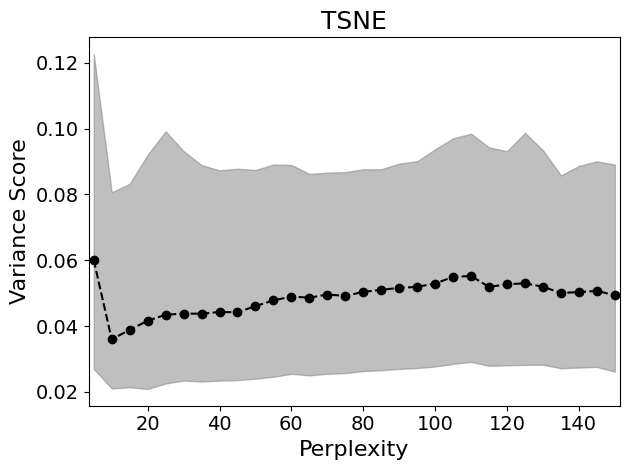

In [6]:
# t-SNE
dirpath = './mousebrain'
best_save_dir = './mousebrain/best_hyperparams'
method = 'tsne'
hyperparam_tag = 'perplexity'
xlabel = "Perplexity"
xscale = 'normal' # normal or log2

#-----------------------------------------------------------------

filenames = os.listdir(dirpath)
method_filenames = [fn for fn in filenames if "_"+method+"_" in fn]
method_filenames = [mfn for mfn in method_filenames if "variance" in mfn]

hyperparams = []
variances = []
hyperparams_single = []
medians = []
uppers = []
lowers = []

for mfn in method_filenames:
    # parse hyperparameter value
    hyperparam = float(mfn.split('_')[3].split(hyperparam_tag)[1])
    # read in variance scores and append
    vscores = np.genfromtxt(os.path.join(dirpath,mfn))
    variances.append(vscores)
    hyperparams.append([hyperparam]*len(vscores))
    # append other info for plotting
    hyperparams_single.append(hyperparam)
    medians.append(np.median(vscores))
    uppers.append(np.percentile(vscores,97.5))
    lowers.append(np.percentile(vscores,2.5))

# save a copy of results files of lowest variance score
best_idx = medians.index(np.min(medians))
mfn = method_filenames[best_idx]
shutil.copyfile(os.path.join(dirpath,mfn), os.path.join(best_save_dir,mfn))
shutil.copyfile(os.path.join(dirpath,mfn.split('_variance')[0]+'.csv'),
                os.path.join(best_save_dir,mfn.split('_variance')[0]+'.csv'))
    
# process results
    
hyperparams = np.concatenate(hyperparams)
variances = np.concatenate(variances)

# sort values
medians = [x for _, x in sorted(zip(hyperparams_single, medians))]
uppers = [x for _, x in sorted(zip(hyperparams_single, uppers))]
lowers = [x for _, x in sorted(zip(hyperparams_single, lowers))]
hyperparams_single = list(sorted(hyperparams_single))

# Make lineplot
if xscale == 'normal':
    #sns.lineplot(x=hyperparams, y=variances, ci='sd')
    plt.plot(hyperparams_single, medians, 'ko--', linewidth=1.5)
    plt.fill_between(hyperparams_single, lowers, uppers, color='0.5', alpha=0.5, interpolate=True)
    plt.xlabel(xlabel, fontsize=16)
    range_x = np.max(hyperparams_single)-np.min(hyperparams_single)
    plt.xlim(np.min(hyperparams_single)-0.01*range_x, np.max(hyperparams_single)+0.01*range_x)
else:
    #sns.lineplot(x=hyperparams, y=np.log2(variances), ci='sd', palette=['k'])
    plt.plot(np.log2(hyperparams_single), medians, 'ko--', linewidth=1.5)
    plt.fill_between(np.log2(hyperparams_single), lowers, uppers, color='0.5', alpha=0.5, interpolate=True)
    plt.xlabel("Log2 "+xlabel, fontsize=16)
    range_x = np.max(np.log2(hyperparams_single))-np.min(np.log2(hyperparams_single))
    plt.xlim(np.min(np.log2(hyperparams_single))-0.01*range_x, np.max(np.log2(hyperparams_single))+0.01*range_x)
plt.title(method.upper(), fontsize=18)
plt.ylabel("Variance Score", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("./mousebrain/"+method+"_"+hyperparam_tag+"_hyperparameters.png", dpi=500)
plt.show()